In [5]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-07-20 04:10:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 173.194.192.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   178MB/s    in 0.4s    

2023-07-20 04:10:07 (178 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [6]:
import zipfile

local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall()
zip_ref.close()

In [9]:
import os

base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
valid_cats_dir = os.path.join(valid_dir, 'cats')
valid_dogs_dir = os.path.join(valid_dir, 'dogs')

In [10]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)
valid_cats_fnames = os.listdir(valid_cats_dir)
valid_dogs_fnames = os.listdir(valid_dogs_dir)

In [11]:
len(train_cats_fnames)

1000

In [12]:
len(train_dogs_fnames)

1000

In [13]:
len(valid_cats_fnames)

500

In [14]:
len(valid_dogs_fnames)

500

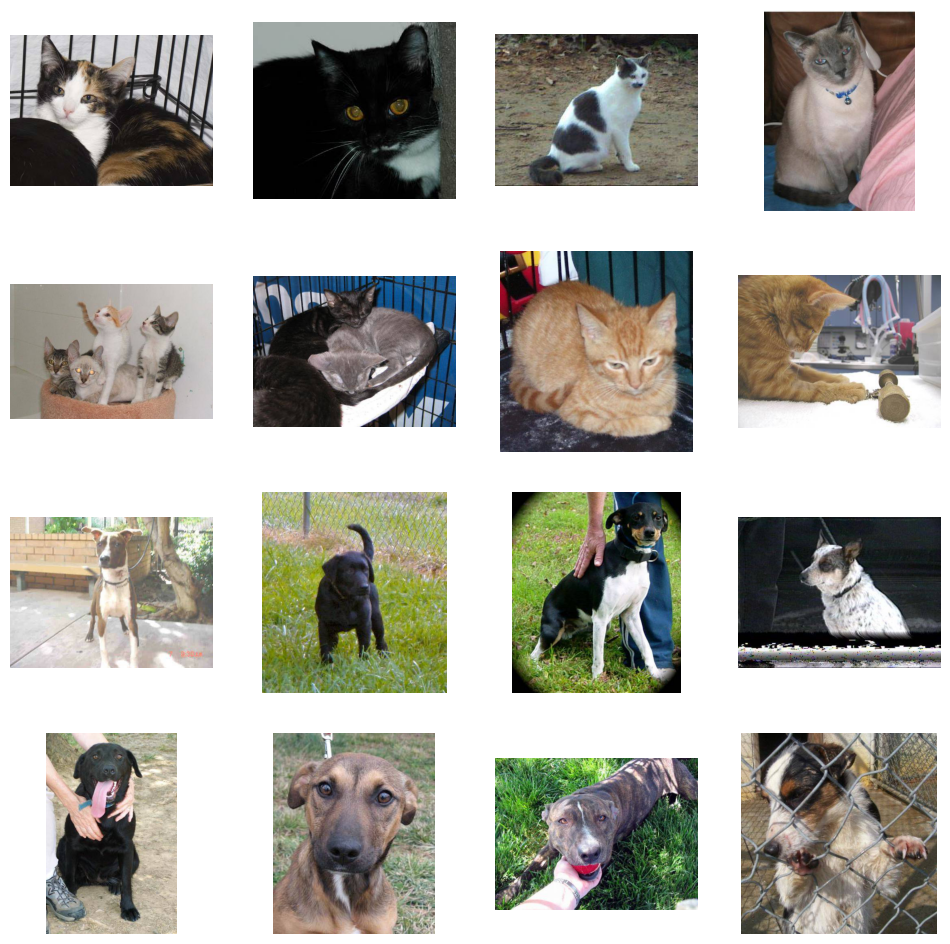

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

ROWS = 4
COLS = 4
PIC_IDX = 0

fig = plt.gcf()
fig.set_size_inches(12,12)
PIC_IDX = PIC_IDX + 8
next_cat_pic = [os.path.join(train_cats_dir, fname)
                  for fname in train_cats_fnames[PIC_IDX - 8:PIC_IDX]]

next_dog_pic = [os.path.join(train_dogs_dir, fname)
                  for fname in train_dogs_fnames[PIC_IDX - 8:PIC_IDX]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  sp = plt.subplot(ROWS, COLS, i+1)
  sp.axis('off')
  plt.imshow(mpimg.imread(img_path))
plt.show()

In [16]:
import tensorflow as tf

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [36]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
train_data_gen = ImageDataGenerator(rescale=1.0/255.0)
valid_data_gen = ImageDataGenerator(rescale=1.0/255.0)

train_gen = train_data_gen.flow_from_directory(train_dir,
                                               batch_size=20,
                                               target_size=(150,150),
                                               class_mode='binary')

valid_gen = valid_data_gen.flow_from_directory(valid_dir,
                                               batch_size=20,
                                               target_size=(150,150),
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
hist = model.fit(train_gen, epochs=15, validation_data = valid_gen)

Epoch 1/15
100/100 [==============================] - 14s 115ms/step - loss: 0.7039 - accuracy: 0.5210 - val_loss: 0.6786 - val_accuracy: 0.6220
Epoch 2/15
100/100 [==============================] - 9s 89ms/step - loss: 0.6666 - accuracy: 0.6000 - val_loss: 0.6409 - val_accuracy: 0.6340
Epoch 3/15
100/100 [==============================] - 10s 101ms/step - loss: 0.6165 - accuracy: 0.6540 - val_loss: 0.6001 - val_accuracy: 0.6700
Epoch 4/15
100/100 [==============================] - 10s 101ms/step - loss: 0.5747 - accuracy: 0.6950 - val_loss: 0.5814 - val_accuracy: 0.6840
Epoch 5/15
100/100 [==============================] - 10s 100ms/step - loss: 0.5385 - accuracy: 0.7410 - val_loss: 0.5363 - val_accuracy: 0.7220
Epoch 6/15
100/100 [==============================] - 10s 100ms/step - loss: 0.4814 - accuracy: 0.7665 - val_loss: 0.5596 - val_accuracy: 0.7220
Epoch 7/15
100/100 [==============================] - 9s 90ms/step - loss: 0.4433 - accuracy: 0.7855 - val_loss: 0.5432 - val_accura

<Figure size 640x480 with 0 Axes>

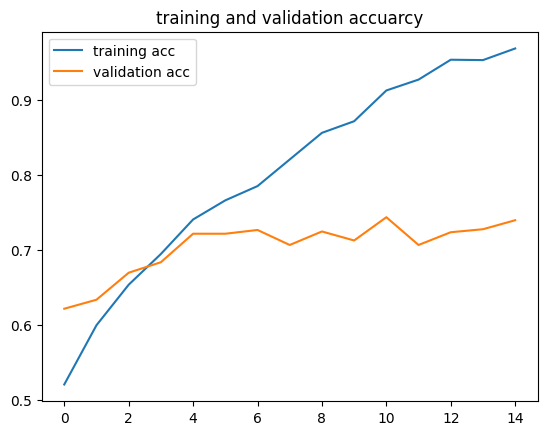

<Figure size 640x480 with 0 Axes>

In [40]:
acc = hist.history['accuracy']
loss = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc, label='training acc')
plt.plot(epochs,val_acc, label='validation acc')
plt.title('training and validation accuarcy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

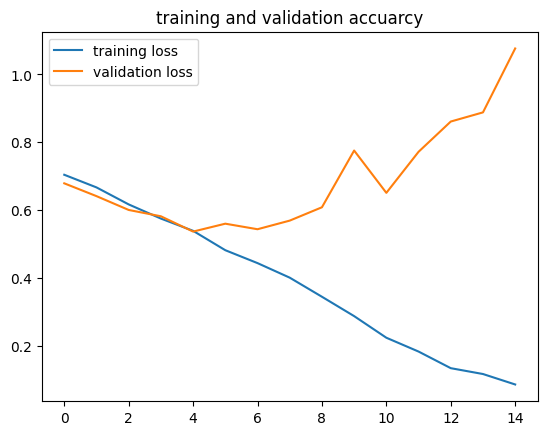

<Figure size 640x480 with 0 Axes>

In [41]:
plt.plot(epochs,loss, label='training loss')
plt.plot(epochs,val_loss, label='validation loss')
plt.title('training and validation accuarcy')
plt.legend()
plt.figure()

In [53]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for f in uploaded.keys():
  path = '/content/' + f
  img = load_img(path, target_size=(150,150))
  img_arr = img_to_array(img)
  img_arr = img_arr / 255.0
  img_arr = np.expand_dims(img_arr, axis=0)
  images = np.vstack([img_arr])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0] > 0.5:
    print('The picture is of dog')
  else:
    print('The Picture is of cat')

Saving dog4.jpg to dog4 (1).jpg
1/1 [==============================] - 0s 18ms/step
[1.]
The picture is of dog
